# Machine Learning: Clustering

This notebook highlights the steps taken to build several clustering models and to compare the results of these models.

The goal of this analysis is to build various clustering models and to determine how well these models cluster a dataset. This comparison will be done by comparing the number of samples that each model assigns to a specific class to the number of samples assigned to those classes by the target column in the dataset.

## The Data

The dataset was comprised of seed kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian. This dataset was obtained from [kaggle](https://www.kaggle.com/datasets/dongeorge/seed-from-uci), and will be used to build the clustering models. 

## Data Attributes

The following features are present in the dataset:

* area A,
* perimeter P,
* compactness C = 4piA/P^2,
* length of kernel, LK
* width of kernel, WK
* asymmetry coefficient, A_coef
* length of kernel groove, LKG

Please note that the dataset also contains a 'target' column, which will be used to compare the results from each model.

# load the Data

In [2]:
# Import libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [6]:
# load the data
df = pd.read_csv('Seed_Data.csv')

df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


# Exploratory Data Analysis

In [7]:
# checking the shape of the data
df.shape

(210, 8)

In [8]:
# checking the data types
df.dtypes

A         float64
P         float64
C         float64
LK        float64
WK        float64
A_Coef    float64
LKG       float64
target      int64
dtype: object

In [9]:
# checking for null values
df.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [10]:
# basic statistics
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [11]:
df.corr()

,A,P,C,LK,WK,A_Coef,LKG,target
A,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
P,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
C,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
LK,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
WK,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
A_Coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
LKG,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
target,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


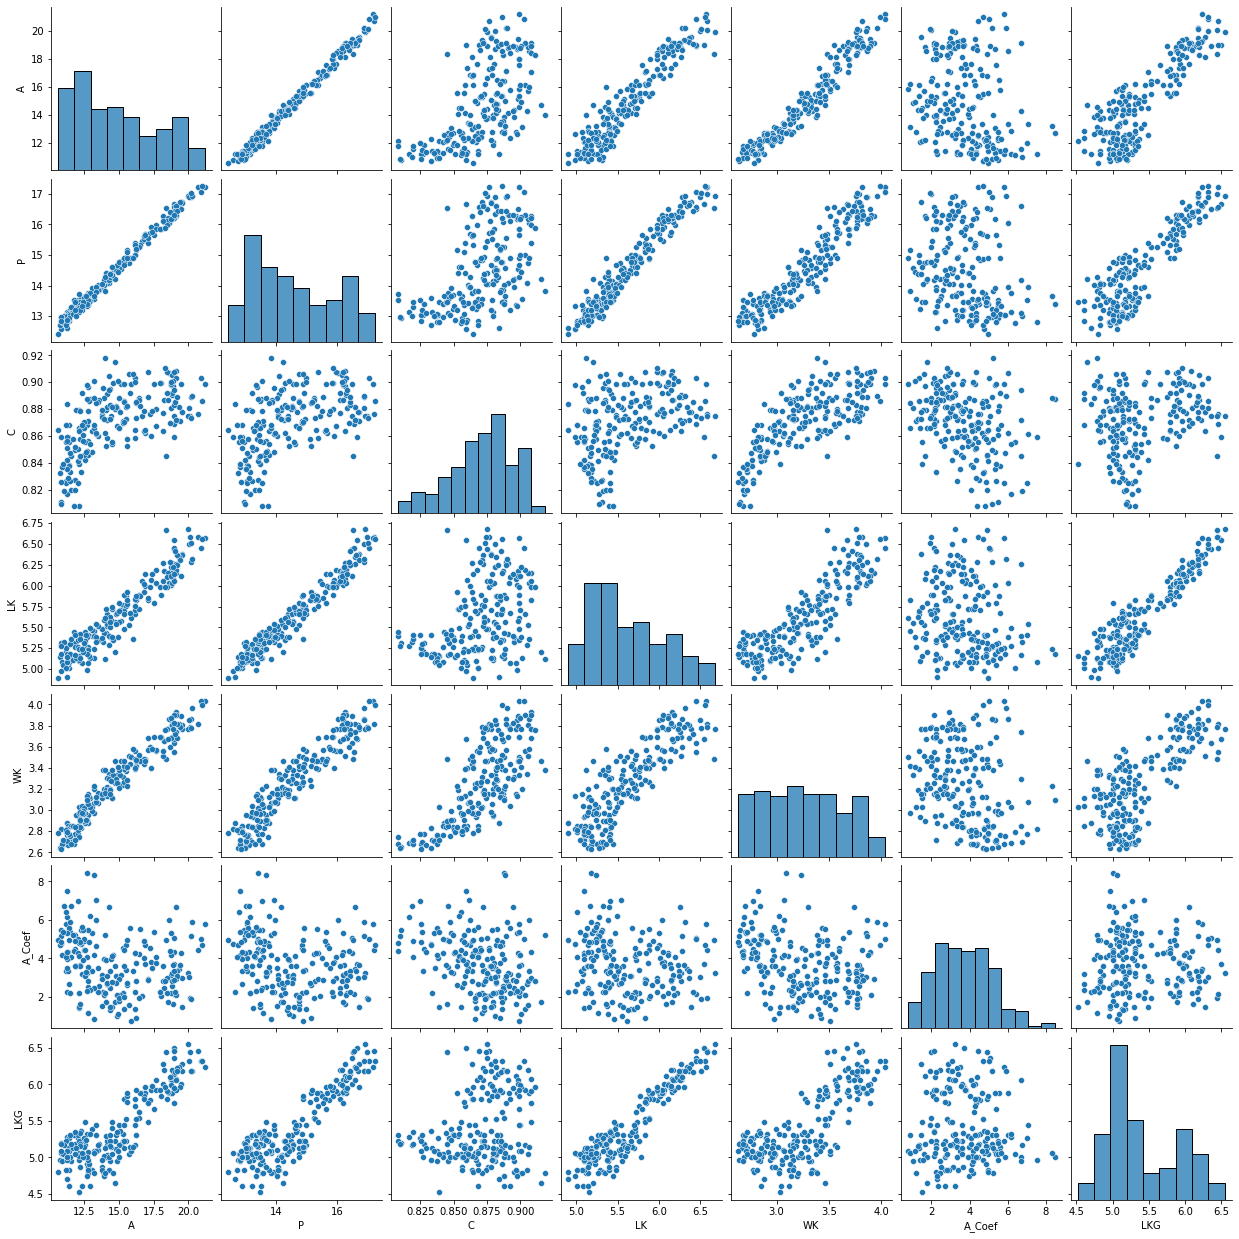

In [12]:
features = [x for x in df.columns if x != 'target']
sns.pairplot(data = df[features])

In [13]:
# determining the skewness of the data
skew_columns = df[features].skew().sort_values(ascending = False)
skew_columns

LKG       0.561897
LK        0.525482
A_Coef    0.401667
A         0.399889
P         0.386573
WK        0.134378
C        -0.537954
dtype: float64

## Machine Learning

As mentioned earlier, this dataset of seed kernels will be used to construct several clustering models. The models to be built are as follows:

* k Means
* Hierarchical Agglomerative Clustering (HAC)
* DBSCAN
* Mean Shift

Since the dataset is comprised of seed kernels from three different types of wheat, these types will be the number of clusters to be created. The goal of this analysis is to compare the results of the aforementioned clustering models to determine which model performed the best.

As the number of clusters is known, k means and HAC should be suited for this analysis as both of those models use the number of clusters as an input argument. DBSCAN and Mean shift do not require the user to know the number of clusters beforehand, so it will be interesting the determine how those unsupervised models cluster the perform.

Before fitting the data to the machine learning models, the data must first be scaled.

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

ml_df = sc.fit_transform(df[features])
ml_df[0:5]


array([[0.44098206, 0.50206612, 0.5707804 , 0.48648649, 0.48610121,
        0.18930164, 0.34515017],
       [0.40509915, 0.44628099, 0.66243194, 0.36880631, 0.50106914,
        0.03288302, 0.21516494],
       [0.34938621, 0.34710744, 0.87931034, 0.22072072, 0.50392017,
        0.25145302, 0.1506647 ],
       [0.3068933 , 0.3161157 , 0.79310345, 0.2393018 , 0.53385602,
        0.19424255, 0.14081733],
       [0.52407932, 0.53305785, 0.86479129, 0.42736486, 0.66429081,
        0.07670104, 0.3229936 ]])

In [15]:
# fit the k means model
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, init = 'k-means++')
km.fit(ml_df)
print('inertia =',  km.inertia_)
df['kmeans'] = km.predict(ml_df) 
df['kmeans'].value_counts()

    

inertia = 22.02436307566604


0    77
2    69
1    64
Name: kmeans, dtype: int64

In [37]:
# fit the HAC model
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
agg.fit(ml_df)
df['agg'] = agg.fit_predict(ml_df) 
df['agg'].value_counts()

0    90
1    67
2    53
Name: agg, dtype: int64

In [20]:
# fit DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2, min_samples = 3)
db.fit(ml_df)
df['db scan'] = db.labels_
df['db scan'].value_counts()

 0    129
 1     54
-1     23
 2      4
Name: db scan, dtype: int64

In [21]:
# fit mean shift
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth = 0.4).fit(ml_df)
df['Mean Shift'] = ms.fit_predict(ml_df)
df['Mean Shift'].value_counts()

0    77
2    71
1    62
Name: Mean Shift, dtype: int64

In [31]:
cluster = [0,1,2,-1]

target = []
kmeans = []
agg = []
DBSCAN = []
Mean_Shift = []


for x in cluster:
    
    kmeans.append(len(df[df['kmeans'] == x]))
    agg.append(len(df[df['agg'] == x]))
    DBSCAN.append(len(df[df['db scan'] == x]))
    Mean_Shift.append(len(df[df['Mean Shift'] == x]))
    target.append(len(df[df['target'] == x]))



    
ml_results = pd.DataFrame(zip(cluster ,target, kmeans, agg, DBSCAN,Mean_Shift),
                          columns = ['cluster','target', 'kmeans', 'agg', 'DBSCAN', 'Mean Shift']).set_index('cluster')


ml_results.replace(to_replace = 0, value = np.NaN, inplace = True)

ml_results

,target,kmeans,agg,DBSCAN,Mean Shift
cluster,,,,,
0,70.0,77.0,90.0,129,77.0
1,70.0,64.0,67.0,54,62.0
2,70.0,69.0,53.0,4,71.0
-1,NaN,NaN,NaN,23,NaN


Text(0.5, 1.0, 'Unsupervised Clustering Comparison')

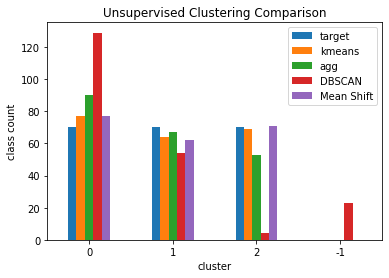

In [34]:
ax = ml_results.plot.bar(rot = 0)
ax.set_ylabel('class count')
ax.set_title('Unsupervised Clustering Comparison')

## Discussion

Referring to the graph above, the k means algorithm performed the closest to the target. This algorithm is suited to this clustering problem as the number of clusters is known. Initiating this algorithm with three centroids and the k means ++ approach allowed the algorithm to cluster the dataset in a similar manner to that of the target.

Further, the Agglomerative model did not perform as well compared to the k means model. The ward linkage approach was used as a distance metric as this linkage minimizes the inertia between the data pair used to initiate the algorithm. This linkage method ultimately performed the best when compared to the single, complete and the average linkages. As the data points are close together, this algorithm ended up over clustering the data into class 0 as seen in the graph above. This over clustering was exacerbated when the other linkage methods were used. As a result, using a model that is reliant on the distance between the data points is not as effective for this clustering problem.

DBSCAN is unsuitable for this clustering exercise since the number of clusters is known. Further, this model was very difficult to tune. Starting with an epsilon of 1, the model clustered all the data points as class 0. This suggested that the data points are close together as mentioned before. Additionally setting epsilon to 0.1, lead to the model clustering the data in at least 6 classes; suggesting that this epsilon value is too small. An epsilon value 0.2 lead to four class and the results are shown above. This model drastically over clustered the data into class 0 and classified 23 data points as outliers. Ultimately, this model is unsuitable as this model is reliant on the distance of the data points from each other, the value of epsilon and the number of data points within the epsilon.

Mean Shift performed similarly to k means but this model is also unsuitable for this analysis as specifying the bandwidth is crucial. A bandwidth of 0.4 was chosen and the results are shown in the graph above. on the other hand, a poor selection of the bandwidth will lead to misclustering the data; that is, the data will be clustered into a different number of classes.
  

## Conclusion

On completing this analysis, the k means model was the most suitable algorithm for this analysis. It clustered the data similarly to the target and each class was balanced. Additionally, this model performed well because the number of clusters was known and the initial distance of the centroids were far apart.

This k means model could be improved by training the model on more data since this data set had only 210 observations. Additionally, the model could be improved by reducing the dimensionality of the features. Efforts should be made to improve the performance of this model to increase its performance and reliability.


